<a href="https://colab.research.google.com/github/sebavassou/aula001py_mba/blob/main/Exercicios4_ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercícios
1. Selecione uma variável contínua de interesse e calcule todas as medidas de dispersão apresentadas (variância e desvios amostrais, bem como amplitude, intervalo interquartílico, coeficiente de dispersão quartílica e coeficiente de variação). Anote em seu caderno a interpretação das medidas obtidas:
1.1. Sua amostra é concentrada ou dispersa?
1.2. A amplitude interna (IIQ) é proporcional à amplitude total da amostra?
1.3. Quais a implicações dessas informações em relação ao contexto/significado
concreto dessa variável?
2. Exiba um gráfico de dispersão (KDE) da variável estudada
2.1. Sinalize os componentes do IIQ (i.e. Q1 e Q3) com linhas verticais na cor cinza;
2.2. Sinalize, com linhas verticais azuis, a média amostral e o primeiro desvio padrão à esquerda e à direita
3. Exiba um gráfico KDE, marcando, quando existir, os outliers;

In [1]:
#Bibliotecas recomendadas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
#Conectando ao Google Drive
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/MyDrive/'

Mounted at /content/drive


In [4]:
#Fazendo a leitura do dataset
import requests

pasta = '/content/drive/MyDrive/Enap'
arquivo = 'ideb.xlsx'
link = 'https://github.com/stefanomozart/estatistica_descritiva/raw/refs/heads/main/dados/originais/ideb/ideb_municipios2017.xlsx'


r = requests.get(link, stream = True)

with open(f"{pasta}/{arquivo}", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

In [5]:
df = pd.read_excel(f"{pasta}/{arquivo}", skipfooter=3, skiprows=9)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SG_UF         11262 non-null  object
 1   COD_MUN       11262 non-null  int64 
 2   NO_MUNICIPIO  11262 non-null  object
 3   REDE          11262 non-null  object
 4   TAP_MED       11262 non-null  object
 5   TAP_M01       11262 non-null  object
 6   TAP_M02       11262 non-null  object
 7   TAP_M03       11262 non-null  object
 8   TAP_M04       11262 non-null  object
 9   TAP_MNS       11262 non-null  object
 10  P12           11262 non-null  object
 11  PB12_MAT17    11262 non-null  object
 12  PB12_PORT17   11262 non-null  object
 13  PAD12_17      11262 non-null  object
 14  IDEB12_17     11262 non-null  object
 15  PROJEM_2019   11262 non-null  object
 16  PROJEM_2021   11262 non-null  object
dtypes: int64(1), object(16)
memory usage: 1.5+ MB


In [12]:

# Converter a coluna 'IDEB12_17' para numérico, tratando erros
df['IDEB12_17'] = pd.to_numeric(df['IDEB12_17'], errors='coerce')

# Exibir informações sobre o DataFrame atualizado
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SG_UF         11262 non-null  object 
 1   COD_MUN       11262 non-null  int64  
 2   NO_MUNICIPIO  11262 non-null  object 
 3   REDE          11262 non-null  object 
 4   TAP_MED       11262 non-null  object 
 5   TAP_M01       11262 non-null  object 
 6   TAP_M02       11262 non-null  object 
 7   TAP_M03       11262 non-null  object 
 8   TAP_M04       11262 non-null  object 
 9   TAP_MNS       11262 non-null  object 
 10  P12           11262 non-null  object 
 11  PB12_MAT17    11262 non-null  object 
 12  PB12_PORT17   11262 non-null  object 
 13  PAD12_17      11262 non-null  object 
 14  IDEB12_17     10914 non-null  float64
 15  PROJEM_2019   11262 non-null  object 
 16  PROJEM_2021   11262 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 1.5+ MB


# HISTOGRAMA

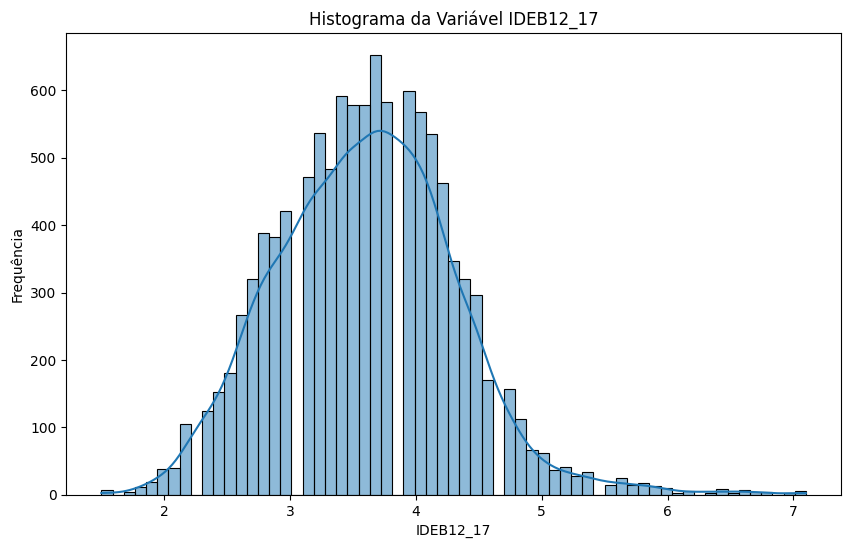

In [14]:
# Plota o histograma da variável IDEB12_17
plt.figure(figsize=(10, 6))
sns.histplot(df['IDEB12_17'], kde=True)
plt.title('Histograma da Variável IDEB12_17')
plt.xlabel('IDEB12_17')
plt.ylabel('Frequência')
plt.show()


In [10]:

# Calcular medidas de dispersão para a variável IDEB12_17

# Variância amostral
variance = df['IDEB12_17'].var()

# Desvio padrão amostral
std_dev = df['IDEB12_17'].std()

# Amplitude
amplitude = df['IDEB12_17'].max() - df['IDEB12_17'].min()

# Intervalo interquartílico (IIQ)
q1 = df['IDEB12_17'].quantile(0.25)
q3 = df['IDEB12_17'].quantile(0.75)
iqr = q3 - q1

# Coeficiente de dispersão quartílica
coefficient_quartile_dispersion = iqr / (q1 + q3)

# Coeficiente de variação
coefficient_variation = (std_dev / df['IDEB12_17'].mean()) * 100


print(f"Variância amostral: {variance}")
print(f"Desvio padrão amostral: {std_dev}")
print(f"Amplitude: {amplitude}")
print(f"Intervalo interquartílico (IIQ): {iqr}")
print(f"Coeficiente de dispersão quartílica: {coefficient_quartile_dispersion}")
print(f"Coeficiente de variação: {coefficient_variation}")


Variância amostral: 0.5159617406337557
Desvio padrão amostral: 0.7183047686280216
Amplitude: 5.6
Intervalo interquartílico (IIQ): 0.9999999999999996
Coeficiente de dispersão quartílica: 0.13888888888888884
Coeficiente de variação: 19.91474365959764


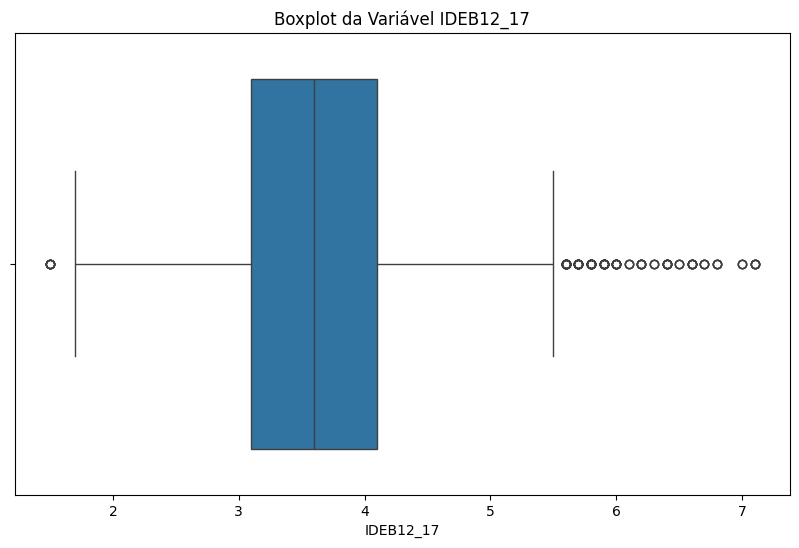

In [17]:
# Boxplot com intervalo interquartil
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['IDEB12_17'])
plt.title('Boxplot da Variável IDEB12_17')
plt.xlabel('IDEB12_17')
plt.show()


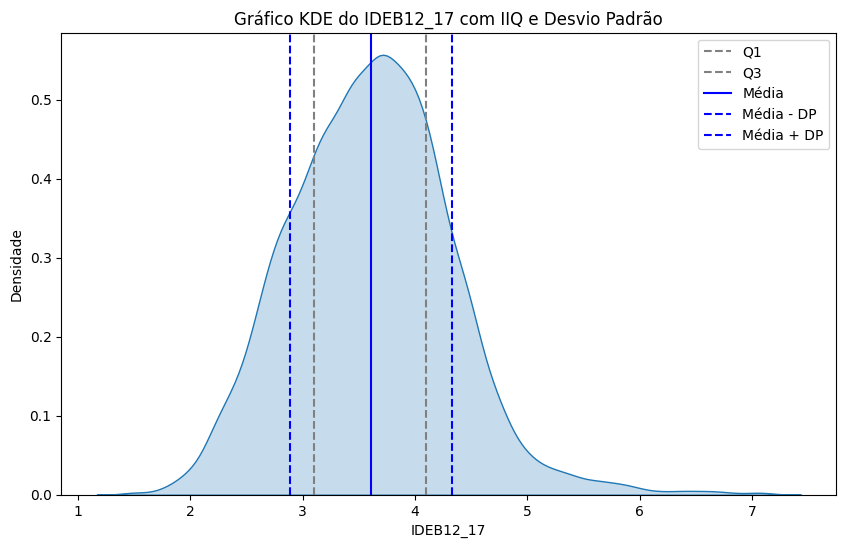

In [11]:

#Plot
#Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula os quartis
q1 = df['IDEB12_17'].quantile(0.25)
q3 = df['IDEB12_17'].quantile(0.75)

# Calcula a média e o desvio padrão
media = df['IDEB12_17'].mean()
desvio_padrao = df['IDEB12_17'].std()

# Cria o gráfico KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(df['IDEB12_17'], fill=True)

# Adiciona linhas verticais para Q1 e Q3 (cinza)
plt.axvline(x=q1, color='gray', linestyle='--', label='Q1')
plt.axvline(x=q3, color='gray', linestyle='--', label='Q3')


# Adiciona linhas verticais para a média e o desvio padrão (azul)
plt.axvline(x=media, color='blue', linestyle='-', label='Média')
plt.axvline(x=media - desvio_padrao, color='blue', linestyle='--', label='Média - DP')
plt.axvline(x=media + desvio_padrao, color='blue', linestyle='--', label='Média + DP')


plt.title('Gráfico KDE do IDEB12_17 com IIQ e Desvio Padrão')
plt.xlabel('IDEB12_17')
plt.ylabel('Densidade')
plt.legend()
plt.show()


SyntaxError: invalid syntax (<ipython-input-15-077a473f2fc1>, line 5)